In [ ]:
!apt-get install python-pydot

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  python-pyparsing
Suggested packages:
  python-pyparsing-doc
The following NEW packages will be installed:
  python-pydot python-pyparsing
0 upgraded, 2 newly installed, 0 to remove and 35 not upgraded.
Need to get 71.7 kB of archives.
After this operation, 347 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 python-pyparsing all 2.2.0+dfsg1-2 [52.1 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python-pydot all 1.2.3-1 [19.6 kB]
Fetched 71.7 kB in 0s (153 kB/s)
Selecting previously unselected package python-pyparsing.
(Reading database ... 144465 files and directories currently installed.)
Preparing to unpack .../python-pyparsing_2.2.0+df

In [ ]:
!pip install pydotplus

In [ ]:
from IPython.display import Image
import pydotplus
import pandas as pd
import numpy as np
from io import StringIO
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams["figure.figsize"] = 10, 5
%matplotlib inline




In [ ]:
# Upload do db full
files.upload()
df_db_full = pd.read_csv("db_full.csv")
df_db_full



Saving db_full.csv to db_full.csv


,Stego?,Entropy_img_full,Mean_entropy_slices,Stdev_entropy_slices,Mean_MarkovChains_00,Mean_MarkovChains_01,Mean_MarkovChains_10,Mean_MarkovChains_11,Stdev_MarkovChains_00,Stdev_MarkovChains_01,Stdev_MarkovChains_10,Stdev_MarkovChains_11,Mean_imgfull_MarkovChains_00,Mean_imgfull_MarkovChains_01,Mean_imgfull_MarkovChains_10,Mean_imgfull_MarkovChains_11,Conditional_Entropy_Slice_01,Conditional_Entropy_Slice_02,Conditional_Entropy_Slice_03,Conditional_Entropy_Slice_04,Conditional_Entropy_Slice_05,Conditional_Entropy_Slice_06,Conditional_Entropy_Slice_07,Conditional_Entropy_Slice_08,Conditional_Entropy_Slice_09,Conditional_Entropy_Slice_10,Conditional_Entropy_Slice_11,Conditional_Entropy_Slice_12,Conditional_Entropy_Slice_13,Conditional_Entropy_Slice_14,Conditional_Entropy_Slice_15,Conditional_Entropy_Slice_16,Conditional_Entropy_Slice_17,Conditional_Entropy_Slice_18,Conditional_Entropy_Slice_19,Conditional_Entropy_Slice_20,Conditional_Entropy_Slice_21,Conditional_Entropy_Slice_22,Conditional_Entropy_Slice_23,Conditional_Entropy_Slice_24,Conditional_Entropy_Slice_25,Conditional_Entropy_Slice_26,Conditional_Entropy_Slice_27,Conditional_Entropy_Slice_28,Conditional_Entropy_Slice_29,Conditional_Entropy_Slice_30,Conditional_Entropy_Slice_31,Conditional_Entropy_Slice_32,Conditional_Entropy_Slice_33,Conditional_Entropy_Slice_34,Conditional_Entropy_Slice_35,Conditional_Entropy_Slice_36
0,1,2.855184,4.113710,3.811394,0.687109,0.312891,0.131138,0.868862,0.165351,0.165351,0.102419,0.102419,0.500000,0.500000,0.000000,1.000000,1.236657,0.795197,0.240627,2.249668,0.168484,3.774709,0.465326,2.110301,0.569058,0.774030,0.346516,3.253149,0.028001,0.998801,0.040015,0.089324,0.200266,2.589319,1.406709,0.557876,0.108493,0.055034,0.047308,2.889373,1.859635,0.386050,0.195474,0.248185,0.035656,3.253950,2.895705,0.236854,0.029199,0.082584,0.048994,3.231052
1,1,4.623277,6.702462,2.586401,0.875000,0.125000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,0.000000,1.000000,3.826009,3.101360,2.182819,1.800592,1.181077,1.448468,4.162324,3.757889,1.607887,2.198147,1.755510,0.857412,3.806595,4.129562,1.513078,1.220211,0.934044,0.437278,3.436515,3.561691,1.901677,0.460193,1.378918,0.962665,1.444423,1.112713,1.211999,0.686348,1.458009,1.438864,3.503776,2.197318,0.355623,0.995414,1.535387,1.679491
2,1,4.994956,8.119187,0.908495,0.875000,0.125000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,0.000000,1.000000,2.444158,2.247035,2.394655,1.941384,2.209097,2.242171,1.891395,0.960221,1.122308,1.198086,1.916793,1.159347,1.358701,1.328713,1.268160,1.189374,1.500794,1.355243,2.576642,2.266855,1.356950,1.075786,2.371543,1.513006,2.427904,2.065351,2.349700,1.841166,2.615427,2.371946,2.503658,2.390372,2.119467,1.750206,1.884288,1.736889
3,1,4.913671,6.277108,1.331119,0.875000,0.125000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,0.000000,1.000000,1.651918,1.519664,0.933722,0.869242,1.541517,2.031039,0.772310,0.477587,0.221536,0.200250,0.308419,0.799964,0.502444,0.311218,0.144544,0.141930,0.212205,0.414602,1.298236,0.871782,0.298259,0.312760,0.363493,0.907390,1.282330,0.457703,0.323120,0.844461,1.099376,1.223992,2.526211,1.177487,0.522513,0.896844,0.994643,1.331178
4,1,5.285118,8.664420,1.202267,0.685826,0.314174,0.216183,0.783817,0.124976,0.124976,0.110717,0.110717,0.500000,0.500000,0.000000,1.000000,1.876771,2.621672,2.517547,1.790602,2.449064,2.819826,1.108571,1.744901,1.087417,1.389993,2.506174,2.345519,1.433477,1.936687,1.324320,1.235647,2.202945,1.835871,1.247319,1.461203,1.525805,1.519104,2.330086,1.541618,1.392654,1.625809,1.539247,1.551774,2.103024,1.500195,2.061944,2.478291,0.941142,1.002536,2.342648,2.514075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0,5.163928,8.620710,0.530726,875.000000,125.000000,0.000000,1.000000,0.

In [ ]:
# Separar as features (x) e o target(y)
x_stego = df_db_full.drop('Stego?', axis=1)
y_stego = df_db_full['Stego?']


In [ ]:
# Separar treino e teste de x,y. Estou usando 25% do db pra teste.
xtrain, xtest, ytrain, ytest = train_test_split(x_stego, y_stego,test_size=0.25,
                                                random_state=1)

In [ ]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()                       
model.fit(xtrain, ytrain)                  
y_model_naive_bayes = model.predict(xtest) 
print("Naive Bayes accuracy : ",accuracy_score(ytest, y_model_naive_bayes))

Naive Bayes accuracy :  0.8947368421052632


In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
tree = DecisionTreeClassifier()
tree = tree.fit(xtrain, ytrain)
y_model_decision_tree = tree.predict(xtest)

print("Decision Tree accuracy: ",accuracy_score(ytest, y_model_decision_tree))

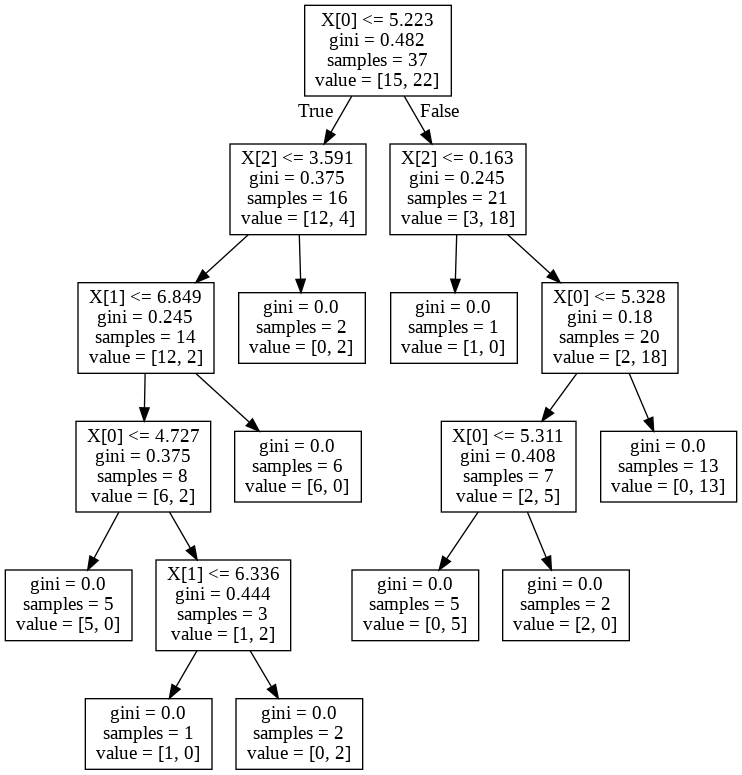

In [ ]:
# Exibindo a arvore de decisões em imagem

dot_data = StringIO()
export_graphviz(tree, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [ ]:
# Perceptron (MLP) 
from sklearn.neural_network import MLPClassifier

# Aplicar random_state ao separar train e test
xtrain_mlp, xtest_mlp, ytrain_mlp, ytest_mlp = train_test_split(x_stego, y_stego,test_size=0.25,
                                                random_state=0)

mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=2000)
mlp.fit(xtrain, ytrain)

predict_train = mlp.predict(xtrain_mlp)
predict_test = mlp.predict(xtest_mlp)

# Score
print(confusion_matrix(ytrain_mlp,predict_train))
print(classification_report(ytrain_mlp,predict_train))

[[57  1]
 [ 4 50]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.96        58
           1       0.98      0.93      0.95        54

    accuracy                           0.96       112
   macro avg       0.96      0.95      0.96       112
weighted avg       0.96      0.96      0.96       112

